In [1]:
# import pandas as pd
# import numpy as np
# import time

# ## data handler
# print("loading data...")
# csv_data_type = {'car_id':np.float64, 'car_type':np.object, 'longitude':np.float64, 'latitude':np.float64, 'gps_time':np.object, 'gps_speed':np.float64, 'direction':np.float64, 'event':np.float64, 'alarm':np.object, 'gps_longitude':np.float64, 'gps_latitude':np.float64, 'altitude':np.float64, 'car_speed':np.float64, 'mileage':np.float64, 'error_type':np.float64, 'operation_code':np.float64, 'system_time':np.object}
# df = pd.read_csv("/tmp/sz_2800w.csv", dtype=csv_data_type, delimiter=':', header=None)
# print(df)

# print("create new csv")
# long = df[2]
# lati = df[3]
# new_df = pd.DataFrame({"longitude":long, "latitude":lati})
# new_df.to_csv('/tmp/sz_simple_2800w.csv', index=False)
# print("Done")

loading data...


/home/sheep/miniconda3/envs/kepler/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


          0       1           2          3                4   5   6   7  8   \
0          1  A0A8W8  113.781093  23.064892  20181011 001735   0  79   5  0   
1          1  A0A8W8  113.781093  23.064892  20181011 003735   0  79   5  0   
2          1  A0A8W8  113.781093  23.064892  20181011 005735   0  79   5  0   
3          1  A0A8W8  113.781093  23.064892  20181011 011735   0  79   5  0   
4          1  A0A8W8  113.781093  23.064892  20181011 013735   0  79   5  0   
...       ..     ...         ...        ...              ...  ..  ..  .. ..   
27999163   9  BY5520  114.247538  22.561525  20181011 234018   0   0   4  0   
27999164   9  BY5520  114.247538  22.561525  20181011 234436   0   0   4  0   
27999165   9  BY5520  114.247538  22.561525  20181011 234845   0   0   4  0   
27999166   9  BY5520  114.247538  22.561525  20181011 235253   0   0   4  0   
27999167   9  BY5520  114.247538  22.561525  20181011 235701   0   0   4  0   

                  9          10  11   12     13  14

In [3]:
from keplergl import KeplerGl
import pandas as pd
import numpy as np
import time

print("loading data...")
df = pd.read_csv("/tmp/sz_simple_2800w.csv", delimiter=',', header=0)
print(df)

print("kepler start drawing, 1w...")
df = df.head(10000)
# start_time = time.time()

map_2 = KeplerGl(height=400, data={"data_1": df})

# print("--- %s seconds ---" % (time.time() - start_time))

map_2

loading data...
           longitude   latitude
0         113.781093  23.064892
1         113.781093  23.064892
2         113.781093  23.064892
3         113.781093  23.064892
4         113.781093  23.064892
...              ...        ...
27999163  114.247538  22.561525
27999164  114.247538  22.561525
27999165  114.247538  22.561525
27999166  114.247538  22.561525
27999167  114.247538  22.561525

[27999168 rows x 2 columns]
kepler start drawing, 1w...
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':        longitude   latitude
0     113.781093  23.064892
1     113.781093  23.064892
2…

In [13]:
import time
from arctern import *
from arctern.util import save_png
from arctern.util.vega import vega_pointmap, vega_weighted_pointmap, vega_heatmap, vega_choroplethmap, vega_icon, vega_fishnetmap

import sys, os
print(sys.prefix)
os.environ["GDAL_DATA"] = sys.prefix + "/share/gdal"
os.environ["PROJ_LIB"] = sys.prefix + "/share/proj"

vega = vega_pointmap(600, 400, bounding_box=[112.10735,22.093627,115.386668,23.547547], point_size=3, point_color="#2DEF4A", opacity=1, coordinate_system="EPSG:4326")
print("arctern start drawing...")
start_time = time.time()
png = point_map_layer(vega, ST_Point(df.longitude, df.latitude))
print("--- %s seconds ---" % (time.time() - start_time))
save_png(png, '/tmp/arctern_pointmap_pandas.png')

/home/sheep/miniconda3/envs/kepler
arctern start drawing...
--- 13.892294645309448 seconds ---


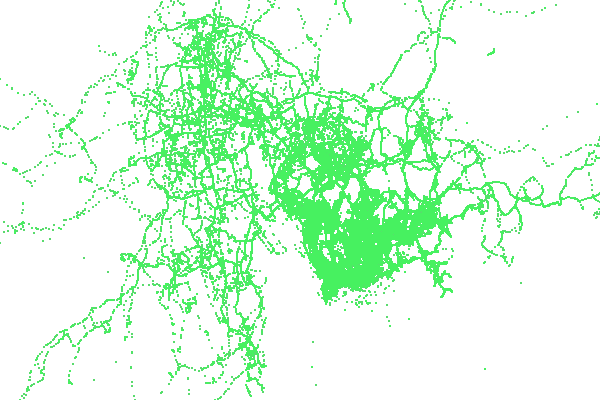

In [14]:
from IPython.display import Image
Image(filename='/tmp/arctern_pointmap_pandas.png') 